In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [140]:
df = pd.read_csv("US_Accidents.csv")

In [141]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [143]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [144]:
df.shape

(7728394, 46)

Cleaning Data

In [145]:
# searching for duplicated values
df.duplicated().sum()

0

In [146]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [147]:
# checking for nulls
df.isna().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [148]:
# determine how much is actually null in the columns
round(df.isna().sum().sort_values(ascending=False) / len(df) * 100,2)

End_Lat                  44.03
End_Lng                  44.03
Precipitation(in)        28.51
Wind_Chill(F)            25.87
Wind_Speed(mph)           7.39
Visibility(mi)            2.29
Wind_Direction            2.27
Humidity(%)               2.25
Weather_Condition         2.24
Temperature(F)            2.12
Pressure(in)              1.82
Weather_Timestamp         1.56
Nautical_Twilight         0.30
Civil_Twilight            0.30
Sunrise_Sunset            0.30
Astronomical_Twilight     0.30
Airport_Code              0.29
Street                    0.14
Timezone                  0.10
Zipcode                   0.02
City                      0.00
Description               0.00
Traffic_Signal            0.00
Roundabout                0.00
Station                   0.00
Stop                      0.00
Traffic_Calming           0.00
Country                   0.00
Turning_Loop              0.00
No_Exit                   0.00
End_Time                  0.00
Start_Time                0.00
Severity

In [149]:
# drops a sizeable amount of data that may not be too informative for ML, comment out if you want to use these columns
df.drop(columns=['ID', 'Source', "End_Lat", "End_Lng","End_Time", "Weather_Timestamp","Zipcode","Street","Country", 'Description','Airport_Code', "Timezone"], inplace=True)

In [150]:
# # remove chance of duplicates
df.drop_duplicates(inplace=True)

In [151]:
#Converting Time figures from abject type to datetime64 type
df['Start_Time']=pd.to_datetime(df['Start_Time'],format='%Y-%m-%d %H:%M:%S')
df['Start_Time'].dtype

dtype('<M8[ns]')

In [152]:
#filling missing values with interpolate method
#limit is Maximum number of consecutive NaNs to fill. Must be greater than 0.
# Solution to fill missing values than completely remove
# df.fillna(method='ffill', limit=5, inplace=True)
# df.fillna(method='bfill', limit=5, inplace=True)

In [153]:
df.isnull().sum()

Severity                       0
Start_Time                     0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
City                         243
County                         0
State                          0
Temperature(F)            155905
Wind_Chill(F)            1980547
Humidity(%)               165646
Pressure(in)              133831
Visibility(mi)            168771
Wind_Direction            165733
Wind_Speed(mph)           560146
Precipitation(in)        2181208
Weather_Condition         165428
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
Sunrise_Su

In [154]:
df.columns
df.shape

(7403220, 34)

Data Columns to analyze

City,
Time,
Year


City Analysis

In [155]:
# Total number of cities
cities = df['City'].unique()
len(cities)

13679

In [156]:
# Top 5 cities for accidents are Miami, Houston, LA, Charlotte, Dallas
cities_by_accident = df['City'].value_counts()
cities_by_accident

Houston                         164854
Miami                           162543
Los Angeles                     150826
Charlotte                       133017
Dallas                          127642
                                 ...  
Mize                                 1
Diller                               1
Lime Springs                         1
District 16                          1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

In [157]:
cities_by_accident[:10]

Houston        164854
Miami          162543
Los Angeles    150826
Charlotte      133017
Dallas         127642
Orlando         97462
Austin          95250
Raleigh         83385
Nashville       70759
Baton Rouge     69613
Name: City, dtype: int64

In [158]:
top_10_cities = cities_by_accident.nlargest(10)
top_10_cities

Houston        164854
Miami          162543
Los Angeles    150826
Charlotte      133017
Dallas         127642
Orlando         97462
Austin          95250
Raleigh         83385
Nashville       70759
Baton Rouge     69613
Name: City, dtype: int64

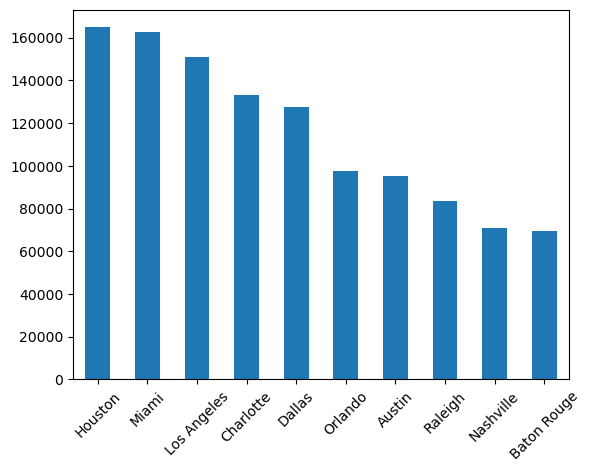

In [159]:
top_10_cities.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [160]:
# Out of the top 100 cities, which had the most accidents: California, Florida, Texas as top 3 
top_100_cities = cities_by_accident[:100]
states = df[df['City'].isin(top_100_cities.index)]
states['State'].value_counts()

CA    600246
FL    481808
TX    467001
NC    217885
LA    120382
TN    117488
SC    107551
AZ     94150
NY     92291
MN     89336
GA     80005
OK     74506
MI     68855
OH     67877
VA     65814
PA     58786
MO     48430
OR     40310
WA     36985
IN     35607
IL     33781
AL     29836
CO     29406
NE     21721
KY     21237
UT     20322
DC     17581
WI     15938
NJ     10308
KS      6011
MD      1861
DE      1747
MA      1637
CT       819
MT       555
MS       513
AR       429
ME       414
NV       310
NH       178
IA       171
WV        77
VT        68
RI        24
ND        21
NM        16
SD         5
WY         3
Name: State, dtype: int64

In [161]:
states_by_accident = df['State'].value_counts()
states_by_accident

CA    1671511
FL     811524
TX     569711
SC     375707
NY     327014
NC     323353
VA     290084
PA     278705
MN     183978
OR     169884
IL     166303
GA     164319
AZ     162303
TN     162239
MI     159222
LA     144277
MD     133026
NJ     129284
OH     116519
WA     105590
AL      99090
UT      93056
CO      87563
OK      83097
MO      75548
CT      66482
IN      65334
MA      61176
WI      34023
KY      31903
NE      28658
MT      27247
IA      25250
AR      21566
NV      21227
KS      20231
DC      17766
RI      16774
MS      14723
DE      13584
WV      13266
ID      10220
NM      10146
NH      10144
WY       3545
ND       3180
ME       2686
VT        926
SD        256
Name: State, dtype: int64

In [162]:
top_10_states = states_by_accident.nlargest(10)

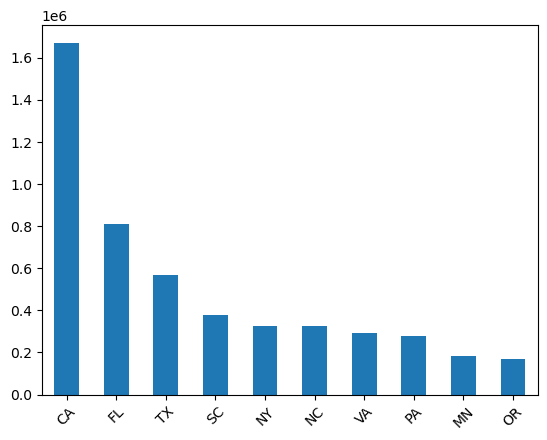

In [163]:
# not regarding top 100 cities, California still holds a large difference in accidents compared to other states
top_10_states.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

Time Analysis

In [164]:
df['Start_Time'].dt.year.sort_values().unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [165]:
df_year = df['Start_Time'].dt.year.value_counts()
df_year

2022    1660200
2021    1471637
2020    1070961
2019     949560
2018     889270
2017     714421
2016     409487
2023     237684
Name: Start_Time, dtype: int64

In [166]:
df_month = df['Start_Time'].dt.month.value_counts()
df_month

12    793574
1     723934
11    715088
10    643179
2     633138
9     628790
8     587876
4     555977
6     553532
3     534853
5     532118
7     501161
Name: Start_Time, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

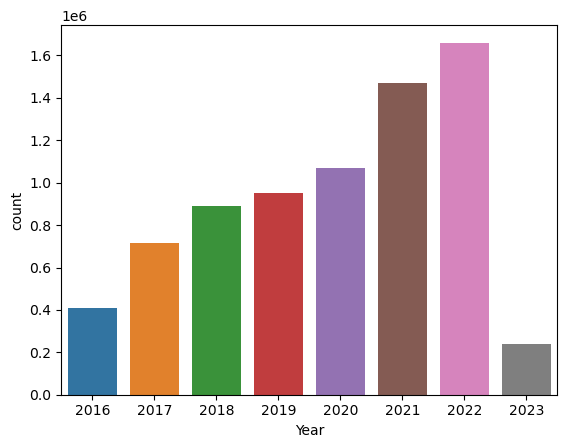

In [167]:
# noticeable spike starting 2019
# this feels weird since its such a considerable rise, even making no changes the data resulted in even worse results, why?
sns.countplot(x=df['Start_Time'].dt.year, data=df)
plt.xlabel("Year")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

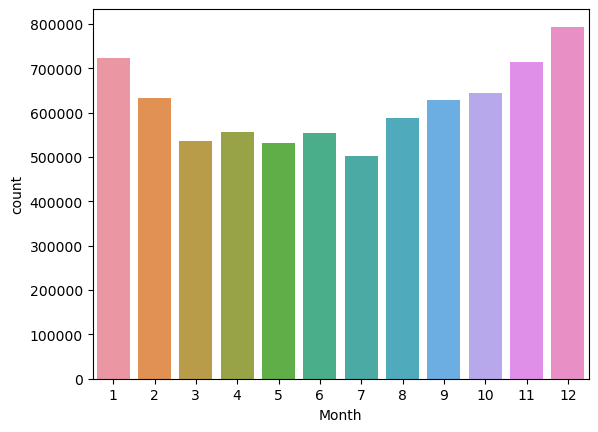

In [168]:
# December has the most accidents, winter season?
sns.countplot(x=df['Start_Time'].dt.month, data=df)
plt.xlabel("Month")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

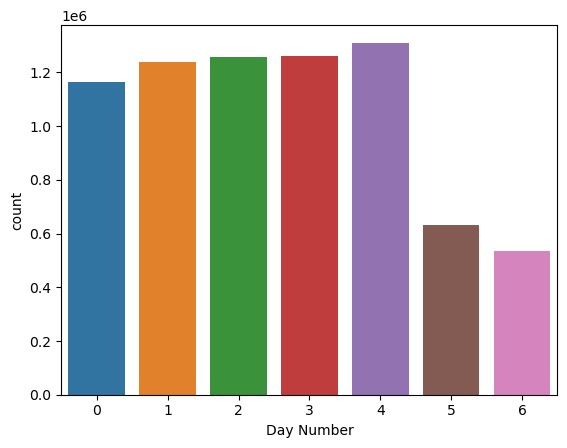

In [169]:
# Friday is highest accident rate, makes sense
sns.countplot(x = df['Start_Time'].dt.dayofweek , data = df)
plt.xlabel("Day Number")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

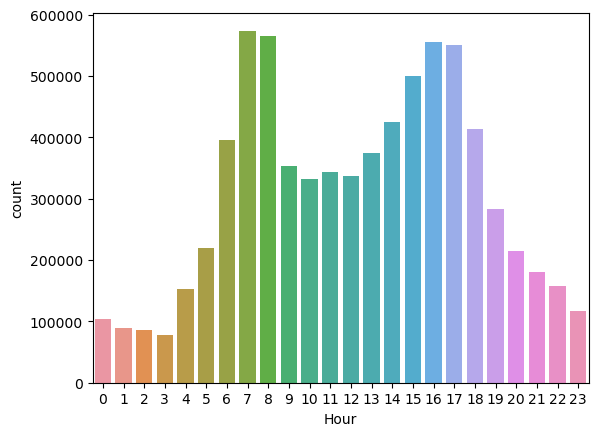

In [170]:
# 16 hour = 4pm, 7 hour is around 7am, work hours
sns.countplot(x = df['Start_Time'].dt.hour , data = df)
plt.xlabel('Hour')
plt.show

C:\Users\valde\AppData\Local\Temp\ipykernel_29264\1337901602.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sundays_start_time['day_labels'] = pd.cut(sundays_start_time['Start_Time'].dt.hour , bins = ranges , labels = labels )


<function matplotlib.pyplot.show(close=None, block=None)>

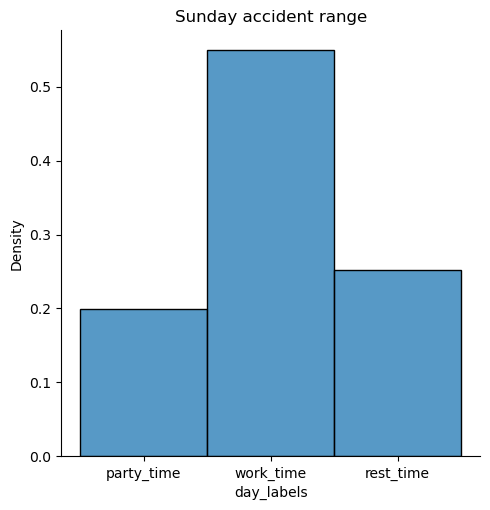

In [171]:
sundays_start_time = df[df['Start_Time'].dt.dayofweek ==6] #change certain day here, right now focuses Sunday


ranges = [0,7,17,23]
labels = ['party_time' , 'work_time' , 'rest_time']
sundays_start_time['day_labels'] = pd.cut(sundays_start_time['Start_Time'].dt.hour , bins = ranges , labels = labels )

sns.displot(x = 'day_labels' , data =sundays_start_time , kde = False , stat='density')
# sns.countplot(x = 'day_labels' , data =sundays_start_time)
plt.title('Sunday accident range')
plt.show

C:\Users\valde\AppData\Local\Temp\ipykernel_29264\382180380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mondays_start_time['day_labels'] = pd.cut(mondays_start_time['Start_Time'].dt.hour , bins = ranges , labels = labels )


<function matplotlib.pyplot.show(close=None, block=None)>

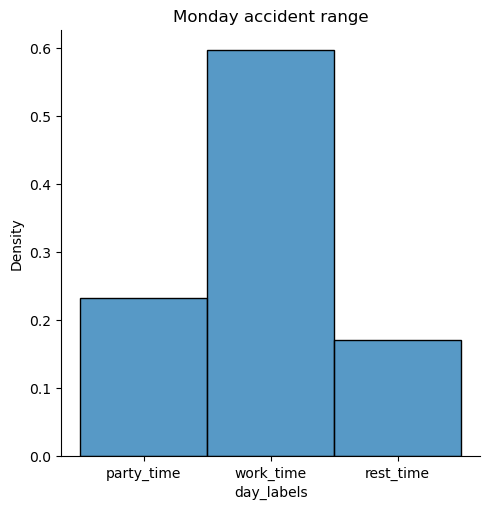

In [172]:
mondays_start_time = df[df['Start_Time'].dt.dayofweek == 0] #change certain day here, right now focuses Monday


ranges = [0,7,17,23]
labels = ['party_time' , 'work_time' , 'rest_time']
mondays_start_time['day_labels'] = pd.cut(mondays_start_time['Start_Time'].dt.hour , bins = ranges , labels = labels )

sns.displot(x = 'day_labels' , data =mondays_start_time , kde = False , stat='density')
# sns.countplot(x = 'day_labels' , data =sundays_start_time)
plt.title('Monday accident range')
plt.show

In [173]:
sample_df = df.sample(int(0.1 * len(df)))


<function matplotlib.pyplot.show(close=None, block=None)>

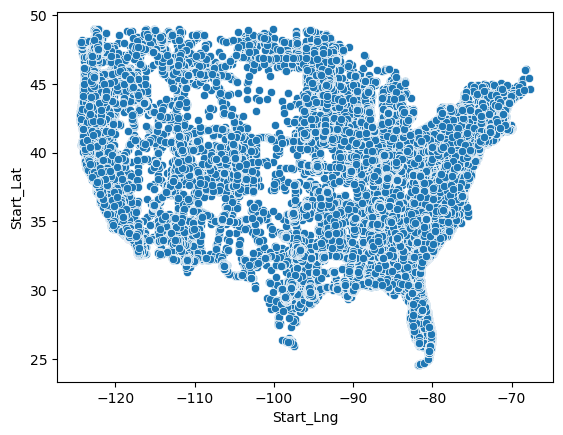

In [174]:
# Surprisingly open space in the North Dakota, lines up with it having not many ocurring accidents
# or that may be where the mountains are?
sns.scatterplot(x = sample_df.Start_Lng , y = sample_df.Start_Lat )
plt.show